In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
# Chuyển đến file Google Drive chứa file dữ liệu csv
%cd"/content/drive/MyDrive/Colab Notebooks/BTVN/2DOF/"

/content/drive/MyDrive/Colab Notebooks/BTVN/2DOF


In [ ]:
# Đọc file dữ liệu đã tạo sẵn
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BTVN/2DOF/2DOF.csv")
data.head()

,theta1,theta2,px,py
0,0.0,0.0,90.000000,0.000000
1,0.0,1.0,89.993908,0.698096
2,0.0,2.0,89.975633,1.395980
3,0.0,3.0,89.945181,2.093438
4,0.0,4.0,89.902562,2.790259


In [ ]:
# Tạo ra x (input) cho mô hình
x=data.drop(['theta1','theta2'],axis=1)
x

,px,py
0,90.000000,0.000000
1,89.993908,0.698096
2,89.975633,1.395980
3,89.945181,2.093438
4,89.902562,2.790259
...,...,...
26995,-17.631705,-22.638790
26996,-17.226303,-22.070437
26997,-16.830882,-21.495096
26998,-16.445562,-20.912941


In [ ]:
# Tạo ra y (output) cho mô hình
y=data[['theta1','theta2']]
y

,theta1,theta2
0,0.0,0.0
1,0.0,1.0
2,0.0,2.0
3,0.0,3.0
4,0.0,4.0
...,...,...
26995,179.0,145.0
26996,179.0,146.0
26997,179.0,147.0
26998,179.0,148.0


In [ ]:
x.shape

(27000, 2)

In [ ]:
y.shape

(27000, 2)

In [ ]:
# Cắt phần dữ liệu x, y đã tạo ra 2 phần với phần training là 60% và test là 40%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
x_train.shape

(16200, 2)

In [ ]:
x_test.shape

(10800, 2)

In [ ]:
y_train.shape

(16200, 2)

In [ ]:
y_test.shape

(10800, 2)

In [ ]:
# Tạo ra mạng ANN để train mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 2 tín hiệu vào và có 128 tín hiệu ra sử dụng hàm relu
model.add(Dense(128,activation='relu',input_shape=(2,)))
# Tạo lớp ẩn thứ hai với 128 tín hiệu vào và có 64 tín hiệu ra sử dụng hàm relu
model.add(Dense(64,activation='relu'))
# Tạo lớp ẩn thứ ba với 64 tín hiệu vào và có 32 tín hiệu ra sử dụng hàm relu
model.add(Dense(32,activation='relu'))
# Tạo lớp ẩn thứ tư với 32 tín hiệu vào và có 16 tín hiệu ra sử dụng hàm relu
model.add(Dense(16,activation='relu'))
# Tạo lớp ẩn thứ năm với 16 tín hiệu vào và có 2 tín hiệu ra sử dụng hàm linear
model.add(Dense(2,activation='linear'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 2)                 34        
                                                                 
Total params: 11,282
Trainable params: 11,282
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch 
model.compile(loss='mse',optimizer='adam',metrics='mae')
#Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣50 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ␣ dừng học
history= model.fit(x_train, y_train, batch_size=50, epochs=500, verbose=1, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=50)])


Epoch 1/500
260/260 [==============================] - 1s 3ms/step - loss: 5.1851 - mae: 1.2449 - val_loss: 2.0322 - val_mae: 0.9466
Epoch 2/500
260/260 [==============================] - 1s 3ms/step - loss: 3.4981 - mae: 1.1333 - val_loss: 4.3417 - val_mae: 1.2757
Epoch 3/500
260/260 [==============================] - 1s 3ms/step - loss: 4.2733 - mae: 1.2353 - val_loss: 16.1559 - val_mae: 2.6369
Epoch 4/500
260/260 [==============================] - 1s 3ms/step - loss: 5.8273 - mae: 1.4726 - val_loss: 2.5465 - val_mae: 0.9740
Epoch 5/500
260/260 [==============================] - 1s 3ms/step - loss: 4.2373 - mae: 1.1896 - val_loss: 5.0025 - val_mae: 1.4309
Epoch 6/500
260/260 [==============================] - 1s 3ms/step - loss: 3.8290 - mae: 1.1737 - val_loss: 4.2476 - val_mae: 1.3283
Epoch 7/500
260/260 [==============================] - 1s 3ms/step - loss: 4.5517 - mae: 1.2775 - val_loss: 5.0930 - val_mae: 1.4319
Epoch 8/500
260/260 [==============================] - 1s 3ms/step -

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test mean absolute error', Score[1])

Test Loss 2.1065895557403564
Test mean absolute error 0.8432028293609619


<function matplotlib.pyplot.show>

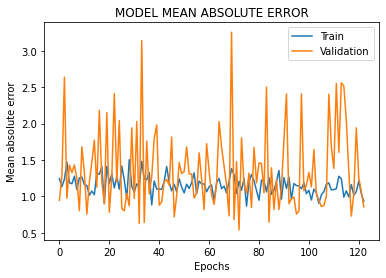

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và sai số trung bình tuyệt đối (Mean absolute error)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MODEL MEAN ABSOLUTE ERROR')
plt.ylabel('Mean absolute error')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Dự doán bộ dữ liệu test và xem sai lệch giữa đầu ra của dữ liệu train và test
predictions=model.predict(x_test)
y_test=np.array(y_test)
print("Predicted values are:", predictions[6])
print("Real values are:",y_test[6])


Predicted values are: [108.29927  108.110504]
Real values are: [108. 108.]


In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('ROBOT 2DOF.ipynb')